# 通过 XP 节点的监控数据分析连接的设备类型

## 通过 core-to-core 的 benchmark 分析 RN-F 节点

In [82]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 读取 CSV 文件形成 DataFrame
file_path = 'data/perf.data.2'
perf_data= pd.read_csv(file_path, sep=';', header=None, names=['count', 'event_name'], usecols=[0, 2])

# 提取第一列的数据
event_counts = perf_data.iloc[:, 0].values.reshape(-1, 1)

# 使用 KMeans 进行聚类
kmeans = KMeans(n_clusters=2, random_state=0).fit(event_counts)

# 获取聚类结果
labels = kmeans.labels_

# 将聚类结果添加到 DataFrame 中
perf_data['label'] = labels

# 打印聚类结果
perf_data

,count,event_name,label
0,503004,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",0
1,0,"arm_cmn_0/mxp_p1_dat_txflit_valid,bynodeid=1,n...",0
2,140452,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",0
3,1793987,"arm_cmn_0/mxp_p1_dat_txflit_valid,bynodeid=1,n...",0
4,0,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",0
...,...,...,...
91,3493,"arm_cmn_0/mxp_p1_dat_txflit_valid,bynodeid=1,n...",0
92,0,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",0
93,0,"arm_cmn_0/mxp_p1_dat_txflit_valid,bynodeid=1,n...",0
94,0,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",0


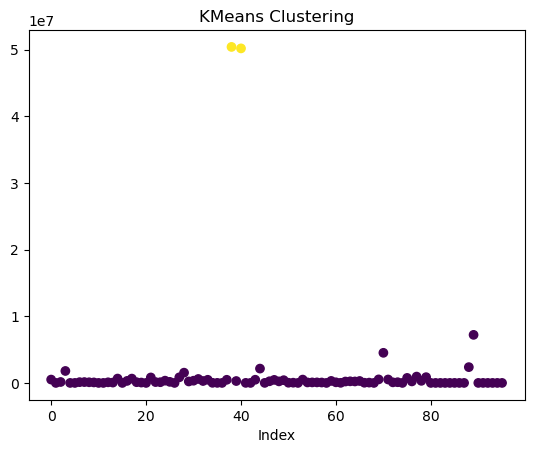

In [83]:
# 可视化聚类结果
plt.scatter(range(len(event_counts)), event_counts, c=labels, cmap='viridis')
plt.xlabel('Index')
plt.title('KMeans Clustering')
plt.show()

In [84]:
# 计算每个聚类标签的频率
label_counts = perf_data['label'].value_counts()
# 找到频率最小的标签
least_common_label = label_counts.idxmin()

# 选出较少的那一类
selected_perf_data = perf_data[perf_data['label'] == least_common_label]
selected_perf_data

,count,event_name,label
38,50425955,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",1
40,50206604,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",1


这里需要写一个逻辑，判断聚类筛选出来的个数：

- 1 个：表明 CPU a 和 CPU b 在同一个 port（因为存在 DSU / CAL，即 2 个 core 组成的 DSU / CAL 作为一个 RN-F 节点），将该 port 标记为 RN-F
- 2 个：表明 CPU a 和 CPU b 分别属于两个 port，将这两个 port 都标记为 RN-F
- 更多个：无法处理，报错

In [85]:
for index, row in selected_perf_data.iterrows():
    event_name: str = row['event_name']
    port = int(event_name[15])
    nodeid = event_name.split('/')[1].split(',')[2][7:]
    print(f'port: {port}, nodeid: {nodeid}')

port: 0, nodeid: 0xd0
port: 0, nodeid: 0x110


## 通过 STREAM benchmark 分析 SN-F 节点

In [86]:
# 读取 CSV 文件形成 DataFrame
file_path = 'data/perf.data.stream'
perf_data= pd.read_csv(file_path, sep=';', header=None, names=['count', 'event_name'], usecols=[0, 2])

# 提取第一列的数据
event_counts = perf_data.iloc[:, 0].values.reshape(-1, 1)

# 使用 KMeans 进行聚类
kmeans = KMeans(n_clusters=4, random_state=0).fit(event_counts)

# 获取聚类结果
labels = kmeans.labels_

# 将聚类结果添加到 DataFrame 中
perf_data['label'] = labels

# 打印聚类结果
perf_data

,count,event_name,label
0,79132460,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",0
1,0,"arm_cmn_0/mxp_p1_dat_txflit_valid,bynodeid=1,n...",0
2,2473741881,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",2
3,2480506336,"arm_cmn_0/mxp_p1_dat_txflit_valid,bynodeid=1,n...",2
4,0,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",0
...,...,...,...
91,76395,"arm_cmn_0/mxp_p1_dat_txflit_valid,bynodeid=1,n...",0
92,0,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",0
93,0,"arm_cmn_0/mxp_p1_dat_txflit_valid,bynodeid=1,n...",0
94,0,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",0


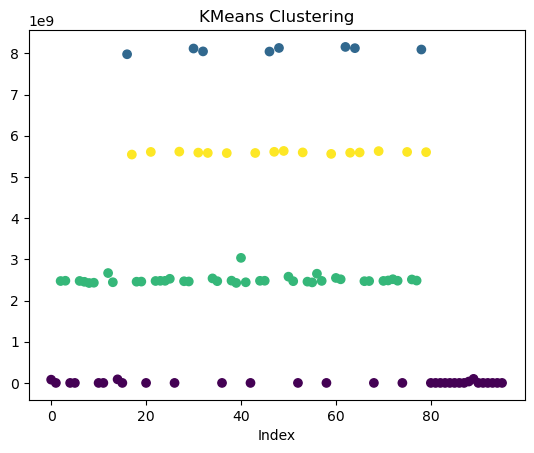

In [87]:
# 可视化聚类结果
plt.scatter(range(len(event_counts)), event_counts, c=labels, cmap='viridis')
plt.xlabel('Index')
plt.title('KMeans Clustering')
plt.show()

In [88]:
# 计算每个聚类标签的频率
label_counts = perf_data['label'].value_counts()
# 找到频率最小的标签
least_common_label = label_counts.idxmin()

# 选出较少的那一类
selected_perf_data = perf_data[perf_data['label'] == least_common_label]
selected_perf_data

,count,event_name,label
16,7979598926,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",1
30,8118703420,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",1
32,8048858333,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",1
46,8044995474,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",1
48,8132379868,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",1
62,8157348519,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",1
64,8127457540,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",1
78,8094474632,"arm_cmn_0/mxp_p0_dat_txflit_valid,bynodeid=1,n...",1


In [89]:
for index, row in selected_perf_data.iterrows():
    event_name: str = row['event_name']
    port = int(event_name[15])
    nodeid = event_name.split('/')[1].split(',')[2][7:]
    print(f'port: {port}, nodeid: {nodeid}')

port: 0, nodeid: 0x8
port: 0, nodeid: 0x1c8
port: 0, nodeid: 0x10
port: 0, nodeid: 0x1d0
port: 0, nodeid: 0x18
port: 0, nodeid: 0x1d8
port: 0, nodeid: 0x20
port: 0, nodeid: 0x1e0
